Explanation of Selected Technique – Data Transformation (Yeo-Johnson)

What it is:
Data Transformation is the process of modifying numeric features so they better meet the assumptions of machine learning models. Many algorithms (e.g., Linear Regression, Logistic Regression) assume input features are normally distributed. If the data is highly skewed or contains extreme values, transformations such as Log, Square Root, or Box-Cox can help. The Yeo-Johnson transformation is a power transformation similar to Box-Cox, but it also works when the data contains zero or negative values.

Why it was needed in our dataset:
In the stores sales forecasting dataset, numeric features like Sales and Profit showed high skewness and even contained negative values.

Using a log transformation was not possible because log is undefined for negative values.

Therefore, I applied the Yeo-Johnson transformation, which can handle both positive and negative numbers.

After applying it, the distributions of Sales and Profit became closer to normal, reducing skewness and making the data more suitable for statistical analysis and machine learning models.

In [19]:
!git clone https://github.com/IT24103956/IT2011-Group-Assignment.git


fatal: destination path 'IT2011-Group-Assignment' already exists and is not an empty directory.


In [20]:
#Load Dataset
import pandas as pd
try:
    df = pd.read_csv("IT2011-Group-Assignment/data/raw/stores_sales_forecasting.csv", encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv("IT2011-Group-Assignment/data/raw/stores_sales_forecasting.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [21]:
#Inspect Numeric Features
df.info()
df.describe()

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric columns:", num_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

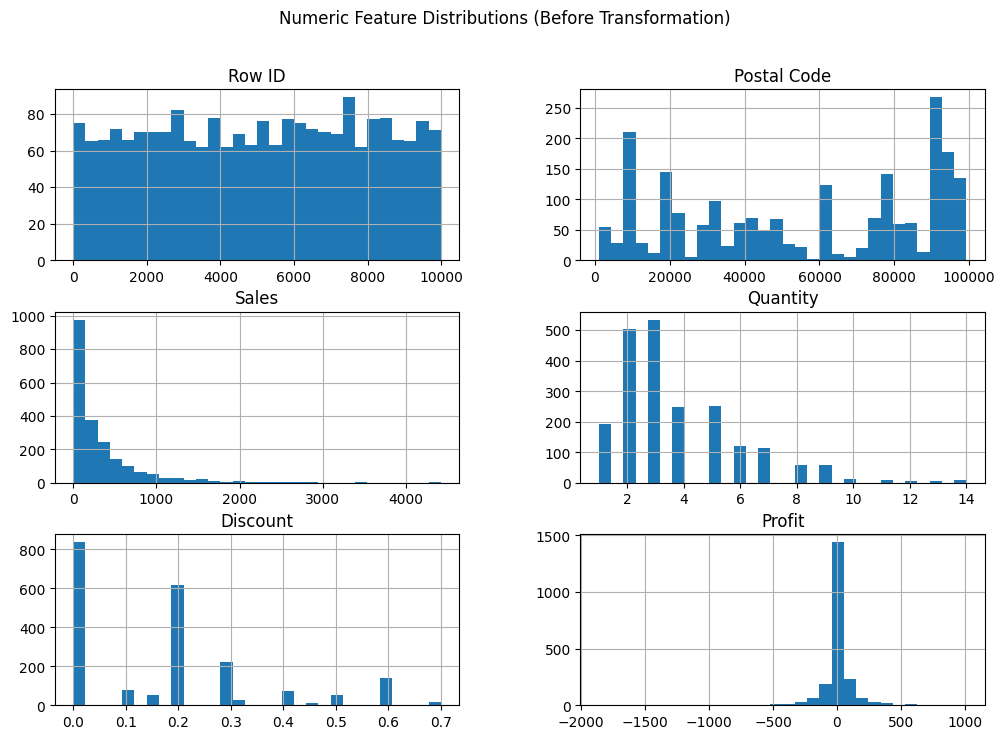

Row ID        -0.030720
Postal Code   -0.161169
Sales          3.349168
Quantity       1.345270
Discount       0.942049
Profit        -2.285456
dtype: float64


In [22]:
#Check Distributions (Before Transformation)
import matplotlib.pyplot as plt

df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions (Before Transformation)")
plt.show()

# Check skewness
print(df[num_cols].skew())


,Sales,YeoJohnson_Sales,Profit,YeoJohnson_Profit
0,261.9600,7.135277,41.9136,46.546659
1,731.9400,8.859197,219.5820,258.351206
2,957.5775,9.336046,-383.0310,-319.489922
3,48.8600,4.640723,14.1694,15.201946
4,1706.1840,10.399259,85.3092,97.070293


array([[<Axes: title={'center': 'YeoJohnson_Sales'}>,
        <Axes: title={'center': 'YeoJohnson_Profit'}>]], dtype=object)

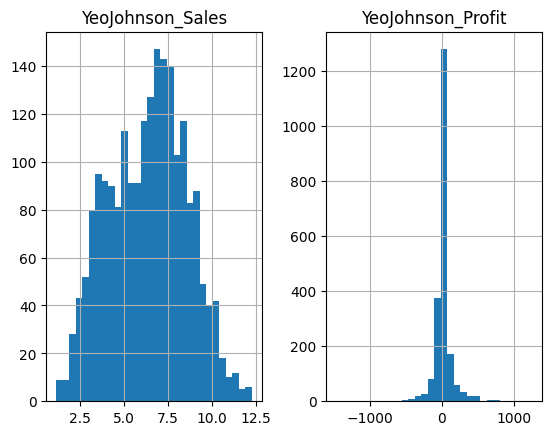

In [31]:
#Apply Transformations
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation to 'Sales' and 'Profit'
df['YeoJohnson_Sales'], _ = yeojohnson(df['Sales'])
df['YeoJohnson_Profit'], _ = yeojohnson(df['Profit'])

# Display the first few rows with the new columns
display(df[['Sales', 'YeoJohnson_Sales', 'Profit', 'YeoJohnson_Profit']].head())

# Visualize the transformed data
df[['YeoJohnson_Sales', 'YeoJohnson_Profit']].hist(bins=30)

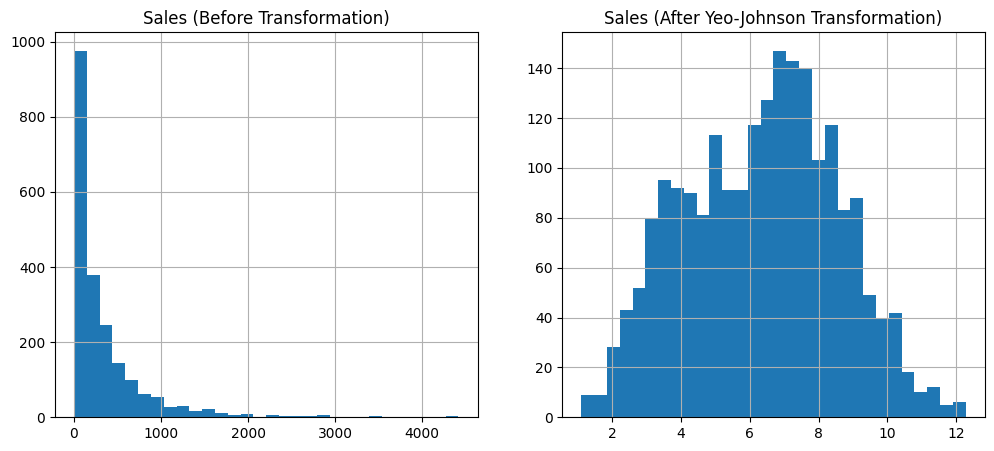

In [33]:
import os

# Create the directory if it doesn't exist
output_dir = '../results/eda_visualizations/'
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['Sales'].hist(bins=30)
plt.title("Sales (Before Transformation)")

plt.subplot(1,2,2)
df['YeoJohnson_Sales'].hist(bins=30)
plt.title("Sales (After Yeo-Johnson Transformation)")

plt.savefig(os.path.join(output_dir, "sales_yeojohnson_transform.png"))
plt.show()

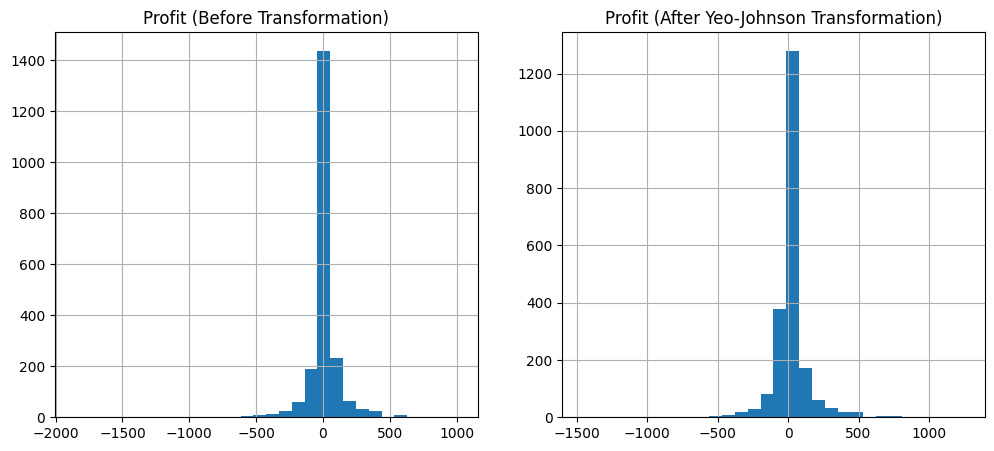

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['Profit'].hist(bins=30)
plt.title("Profit (Before Transformation)")

plt.subplot(1,2,2)
df['YeoJohnson_Profit'].hist(bins=30)
plt.title("Profit (After Yeo-Johnson Transformation)")

plt.savefig(os.path.join(output_dir, "profit_yeojohnson_transform.png"))
plt.show()

Interpretation

Before transformation → distributions were highly skewed.

After transformation → closer to normal distribution.

This reduces the effect of extreme values and helps algorithms that assume normality.